# MDI341: TP Graphs

**Warning**: Ce notebook a été conçu pour fonctionner avec NetworkX version 1.11. De légers problèmes de compatibilité peuvent être rencontrés avec NetworkX 2.x.

In [1]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import os.path
import urllib
import tarfile
import scipy.stats

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
print("Version de NetworkX: ", nx.__version__)

Version de NetworkX:  1.11


**Note** : la documentation de NetworkX se trouve [ici](http://networkx.readthedocs.io/)

## Analyse de graphes

### Erdős-Rényi

#### Question 1

On commence par créer et visualiser un graphe de type Erdős-Rényi avec n=200 noeuds et p=0.04. Vous aurez besoin des fonctions `nx.erdos_renyi_graph` et `nx.draw`.

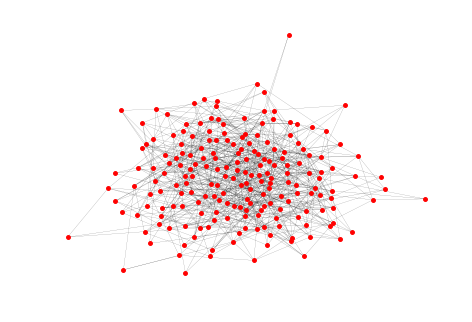

In [4]:
n = 200
p = 0.04
G_erdos = nx.erdos_renyi_graph(n,p)
nx.draw(G_erdos,node_size=15,width=0.1)

#### Question 2

Calculons des statistiques sur le nombre d'arêtes et la distribution des degrés.

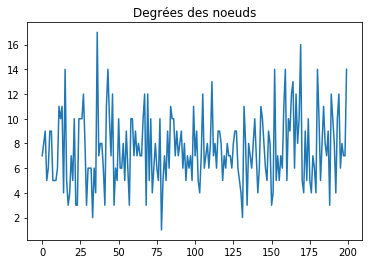

Degrée minimal: 1
Degrée maximal: 17
Degrée médian: 7.0
Espérance, valeur moyenne attendue: 8.0
Moyenne empirique: 7.52


In [5]:
n = 200
p = 0.04
G_erdos = nx.erdos_renyi_graph(n,p)

X=list(G_erdos.degree().keys())
Y=list(G_erdos.degree().values())

plt.plot(X,Y)
plt.title('Degrées des noeuds')
plt.show()

# min, max et médian
print('Degrée minimal:',np.min(Y))
print('Degrée maximal:',np.max(Y))
print('Degrée médian:',np.median(Y))

# moyenne
print('Espérance, valeur moyenne attendue:',n*p)
print('Moyenne empirique:',np.mean(Y))

La valeur moyenne empirique est assez proche de l'espérance mais elle fluctue d'environs 5% autours de la valeur attendue.
On peut gagner en précision, réduire l'écart entre la valeur attendue et la valeur estimée en augmentant évidemment le nombre de noeud. Pour garder une espérance constante il faut adapter la probabilité de créer une arrête entre deux noeuds, dans le résultat ci-dessous on a multiplié par 10 le nombre de noeud et divisé par 10 la probabilité.

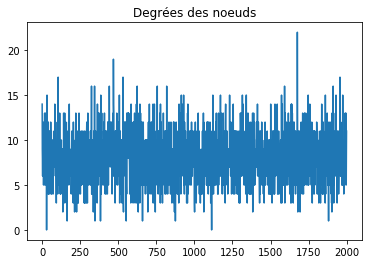

Degrée minimal: 0
Degrée maximal: 22
Degrée médian: 8.0
Espérance, valeur moyenne attendue: 8.0
Moyenne empirique: 7.961


In [6]:
n = 2000
p = 0.004
G_erdos = nx.erdos_renyi_graph(n,p)

X=list(G_erdos.degree().keys())
Y=list(G_erdos.degree().values())

plt.plot(X,Y)
plt.title('Degrées des noeuds')
plt.show()

# min, max et médian
print('Degrée minimal:',np.min(Y))
print('Degrée maximal:',np.max(Y))
print('Degrée médian:',np.median(Y))

# moyenne
print('Espérance, valeur moyenne attendue:',n*p)
print('Moyenne empirique:',np.mean(Y))

#### Question 3

On trace la distribution des degrés en échelle normale, puis en échelle log-log. La fonction `nx.degree_histogram` vous sera utile.

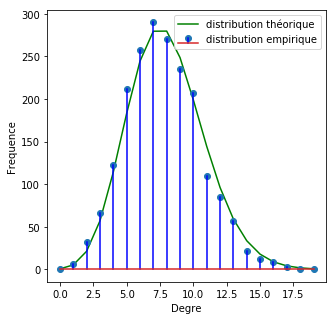

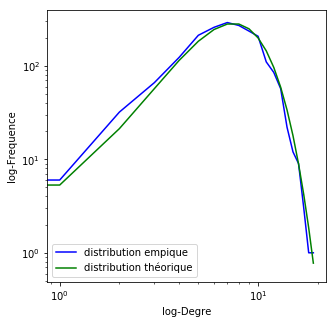

In [7]:
n = 2000
p = 0.004
G_erdos = nx.erdos_renyi_graph(n,p)

degree_freq = nx.degree_histogram(G_erdos)
y=degree_freq
y_theory=[np.sum(y)*scipy.stats.binom.pmf(i,n,p) for i in range(len(y))]

plt.figure(figsize=(5, 5))
plt.plot(y_theory, 'g-',label='distribution théorique')
plt.stem(y, 'b-',label='distribution empirique')
plt.ylabel("Frequence")
plt.xlabel("Degre")
plt.legend()

plt.figure(figsize=(5, 5))
plt.loglog(y, 'b-',label='distribution empique')
plt.loglog(y_theory, 'g-',label='distribution théorique')
plt.ylabel("log-Frequence")
plt.xlabel("log-Degre")
plt.legend()
plt.show()

Pour mieux observer la concoordance entre la théorie et la pratique, nous avons pris le nombre de noeuds n=2000 et la probabilité de liaison p=0.004 (pour conserver une espéranc à 8). Ainsi on constate que la distribution des degrées semble à peu près correspondre avec une loi binomiale de paramètre (n,p).

#### Question 4

On calcule maintenant le coefficient de clustering global (voir `nx.clustering`)

Pour calculer le coefficient de clustering global, il faut d'abord calculer le coefficient de clustering local pour chaque noeud. Le coefficient de clustering global est la moyenne des clusterings locaux. La valeur théorique de ce coefficient de clustering global est p.

In [8]:
n = 200
p = 0.04
G_erdos = nx.erdos_renyi_graph(n,p)

clustering_loc=list(nx.clustering(G_erdos).values())
print('Coefficient de clustering global empirique:',np.sum(clustering_loc)/len(clustering_loc))
print('Coefficient de clustering global théorique:',p)

Coefficient de clustering global empirique: 0.04584471084471084
Coefficient de clustering global théorique: 0.04


Pour n=200, nous trouvons régulièrement des écarts supérieurs à 5%. Nous avons donc testé pour n=2000 sans modifier la probabilité, ainsi les écarts passent en-dessous du 1%. La valeur théorique concorde bien avec la valeur obtenue.

In [9]:
n = 2000
p = 0.04
G_erdos = nx.erdos_renyi_graph(n,p)

clustering_loc=list(nx.clustering(G_erdos).values())
print('Coefficient de clustering global empirique:',np.sum(clustering_loc)/len(clustering_loc))
print('Coefficient de clustering global théorique:',p)

Coefficient de clustering global empirique: 0.03943318765208949
Coefficient de clustering global théorique: 0.04


#### Question 5

On affiche la longueur moyenne des plus courts chemins et le diamètre du graphe

Longueur moyenne des plus courts chemins: 2.812361809045226
Diamètre du graphe: 5


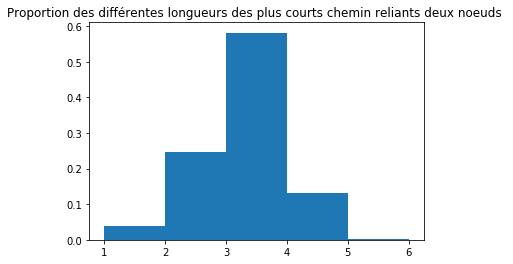

Le plus grand Coefficient de clustering local : 0.2


In [10]:
n = 200
p = 0.04
G_erdos = nx.erdos_renyi_graph(n,p)

print('Longueur moyenne des plus courts chemins:',nx.average_shortest_path_length(G_erdos))
print('Diamètre du graphe:',nx.diameter(G_erdos))

lenght_all_shortest_path = np.array([])
lenght = nx.all_pairs_shortest_path_length(G_erdos)
for i in range(0,n):
    for j in range(i+1,n):
        lenght_all_shortest_path = np.concatenate((lenght_all_shortest_path,np.array([lenght[i][j]])),axis=0)
plt.title("Proportion des différentes longueurs des plus courts chemin reliants deux noeuds ")
plt.hist(lenght_all_shortest_path,bins=[1,2,3,4,5,6],density=True)
plt.show()
clustering_loc=list(nx.clustering(G_erdos).values())
print('Le plus grand Coefficient de clustering local :',max(clustering_loc))

On parle d'effet "petit monde" quand le chemin pour relier deux personnes est toujours petit. La longueur moyenne des plus cours chemins est d'environs 2.7.De plus le diamètre, c'est dire le plus long des courts chemins, est de 5 donc il n'y a que 5 liaisons qui sépare les deux personnes les plus éloignées sur un groupe de 200 individus! Mais peut-on parler d'effet "petit monde". Tout dépend du nombre de noeuds déjà présents! Ici le nombre de noeud n'est pas significatif, de plus les coefficients de clustering sont faibles, ce qui démontrent un maillage peu dense entre ami, ce qui n'est pas favorable à un effet petit monde.

https://www.google.com/search?q=small+world+phenomenon+graph&ie=utf-8&oe=utf-8&client=firefox-b-ab

### Barabási–Albert

#### Question 6

On crée et visualise maintenant un graphe de Barabási–Albert avec n=200 noeuds (on ajoute à chaque fois m=3 arêtes), puis on applique la même analyse que celle faite pour Erdős-Rényi

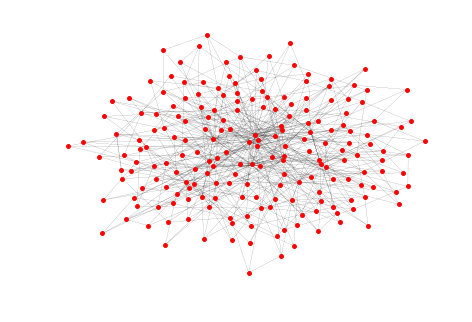

In [11]:
n = 200
m = 3
G_barabasi = nx.barabasi_albert_graph(n,m)
nx.draw(G_barabasi,node_size=15,width=0.1)

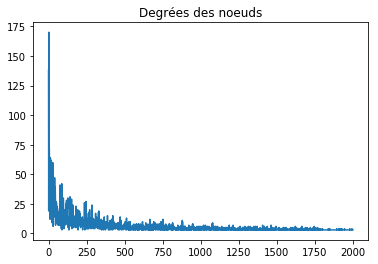

Degrée minimal: 3
Degrée maximal: 170
Degrée médian: 4.0
Moyenne empirique: 5.991


In [12]:
n = 2000
m = 3
G_barabasi = nx.barabasi_albert_graph(n,m)

X=list(G_barabasi.degree().keys())
Y=list(G_barabasi.degree().values())

plt.plot(X,Y)
plt.title('Degrées des noeuds')
plt.show()

# min, max et médian
print('Degrée minimal:',np.min(Y))
print('Degrée maximal:',np.max(Y))
print('Degrée médian:',np.median(Y))

# moyenne
#print('Espérance, valeur moyenne attendue:',n*p)
print('Moyenne empirique:',np.mean(Y))

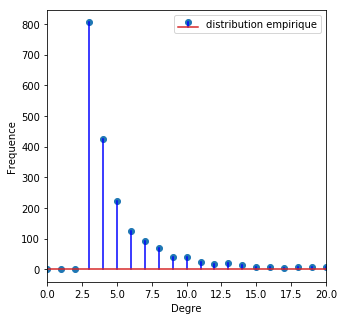

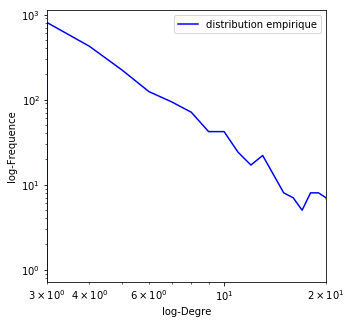

In [13]:
degree_freq = nx.degree_histogram(G_barabasi)
y=degree_freq
y_theory=[np.sum(y)*scipy.stats.binom.pmf(i,n,p) for i in range(len(y))]

plt.figure(figsize=(5, 5))
plt.xlim(0,20)
plt.stem(y, 'b-',label='distribution empirique')
plt.ylabel("Frequence")
plt.xlabel("Degre")
plt.legend()

plt.figure(figsize=(5, 5))
plt.xlim(3,20)
plt.loglog(y, 'b-',label='distribution empirique')
plt.ylabel("log-Frequence")
plt.xlabel("log-Degre")
plt.legend()
plt.show()

D'après la théorie la distribution de degré suit une loi proportionnelle à $k^{-\alpha}$. Le graph log-log nous confirme cela, puisqu'on obtient un droite entre le nombre de noeud en fonction du degré. La théorie est donc conforme à la pratique.

In [14]:
clustering_loc=list(nx.clustering(G_barabasi).values())
print('Coefficient de clustering global empirique:',np.sum(clustering_loc)/len(clustering_loc))

Coefficient de clustering global empirique: 0.02033243501117313


Longueur moyenne des plus courts chemins: 2.872562814070352
Diamètre du graphe: 5


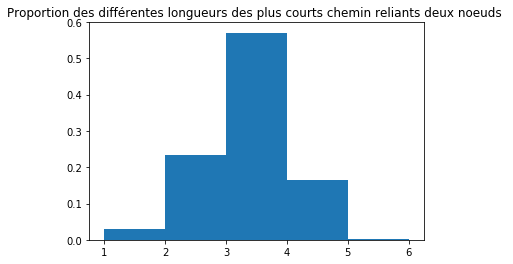

Le plus grand Coefficient de clustering local : 0.6666666666666666


In [15]:
n = 200
m = 3
G_barabasi = nx.barabasi_albert_graph(n,m)

print('Longueur moyenne des plus courts chemins:',nx.average_shortest_path_length(G_barabasi))
print('Diamètre du graphe:',nx.diameter(G_barabasi))

lenght_all_shortest_path = np.array([])
lenght = nx.all_pairs_shortest_path_length(G_barabasi)
for i in range(0,n):
    for j in range(i+1,n):
        lenght_all_shortest_path = np.concatenate((lenght_all_shortest_path,np.array([lenght[i][j]])),axis=0)
plt.title("Proportion des différentes longueurs des plus courts chemin reliants deux noeuds ")
plt.hist(lenght_all_shortest_path,bins=[1,2,3,4,5,6],density=True)
plt.show()
clustering_loc=list(nx.clustering(G_barabasi).values())
print('Le plus grand Coefficient de clustering local :',max(clustering_loc))

On trouve un diamètre, une longueur moyenne du plus court chemin et une distribution des plus courts chemins équivalentes au modèle précédent. Par contre le plus grand coefficient de clustering local est plus élevé, or un coefficient de clustering plus élevé est signe d'un effet "petit monde" plus important puisque le maillage, entre amis respectives, est plus dense.

## Graphe Karate Club

On va maintenant travailler sur un graphe réel de petite taille (n=34, m=78) qui représente les liens d'amitié entre les adhérents d'un club de karaté (le graphe est intégré à la librairie `networkx`)

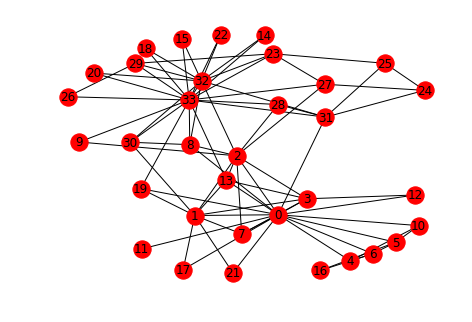

In [16]:
n=34
G_karate = nx.karate_club_graph()

# on définit une position des noeuds qui peut être ré-utilisée plusieurs fois
# en appelant la fonction nx.draw avec l'option pos=pos
pos = nx.spring_layout(G_karate)
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)

#### Question 7

On va appliquer un clustering hiérarchique pour faire de la détection de communauté. On calcule d'abord la matrice des distances entre noeuds, où la distance entre 2 noeuds correspond à la longueur du plus court chemin

In [17]:
# le code suivant calcule une matrice de taille n x n
# distances[i, j] contient la longueur du plus court chemin entre les noeuds i et j
pcc_longueurs=nx.all_pairs_shortest_path_length(G_karate)
distances=np.zeros((n,n))

for i in range(n):
    for j in range(n):
        distances[i, j] = pcc_longueurs[i][j]

On peut maintenant utiliser l'implémentation de clustering hiérarchique ascendant de `scikit-learn` avec le *lien moyen* comme mesure de dissimilarité entre clusters. On affiche tout d'abord le clustering à 4 clusters

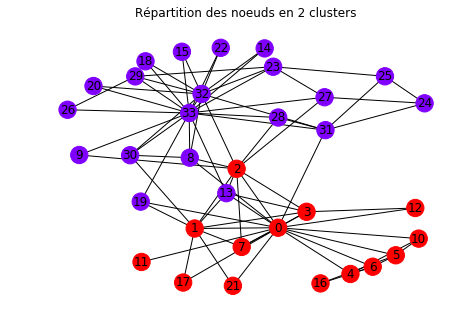

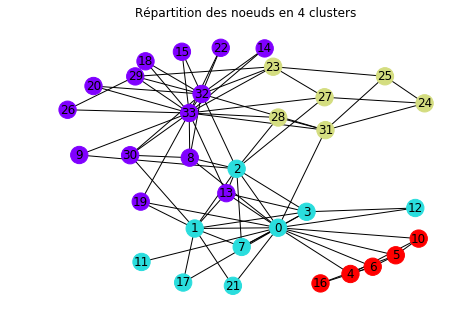

In [18]:
from sklearn.cluster import AgglomerativeClustering

# TODO QUESTION 7
clustering = AgglomerativeClustering(2,linkage='average',affinity='precomputed').fit(distances)
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'),node_color=clustering.labels_, with_labels=True, pos=pos)
plt.title("Répartition des noeuds en 2 clusters")
plt.show()

clustering = AgglomerativeClustering(4,linkage='average',affinity='precomputed').fit(distances)
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'),node_color=clustering.labels_, with_labels=True, pos=pos)
plt.title("Répartition des noeuds en 4 clusters")
plt.show()

La répartition en 2 clusters du groupe de karaté semble réaliste, par contre en 4 clusters cela semble de moins en moins réaliste puisque certaines personnes d'un clusters semblent se retrouver au milieu d'autres clusters à l'image du noeuds 2.

On a également testé le clustering avec différentes "linkage" pour la mesure euclidienne car la mesure "precomputed" ne marche pas pour chaque linkage. On observe, ci-dessous qu'il y a plusieurs variations en fonction de la mesure choisie, mais aussi du linkage (comparaison entre le précédent graphique et le troisième graphique ci-dessous). 

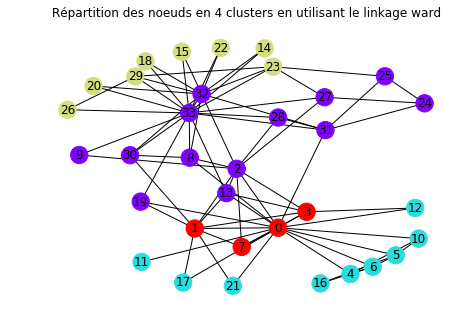

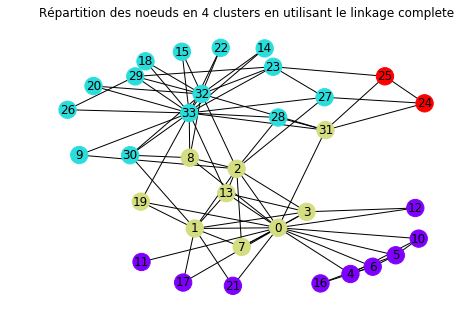

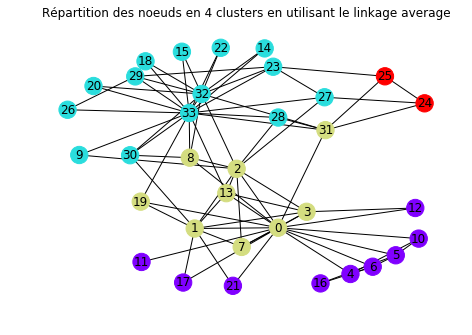

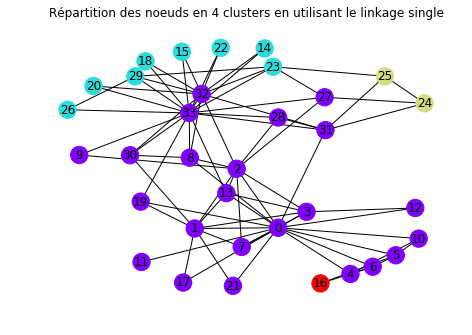

In [19]:
linkage=["ward", "complete", "average", "single"]
for link in linkage:
    clustering = AgglomerativeClustering(4,linkage=link,affinity='euclidean').fit(distances)
    nx.draw(G_karate, cmap = plt.get_cmap('rainbow'),node_color=clustering.labels_, with_labels=True, pos=pos)
    plt.title("Répartition des noeuds en 4 clusters en utilisant le linkage " + link)
    plt.show()

#### Question 8

On va mettre en évidence visuellement les différences entre quelques mesures de centralité des noeuds

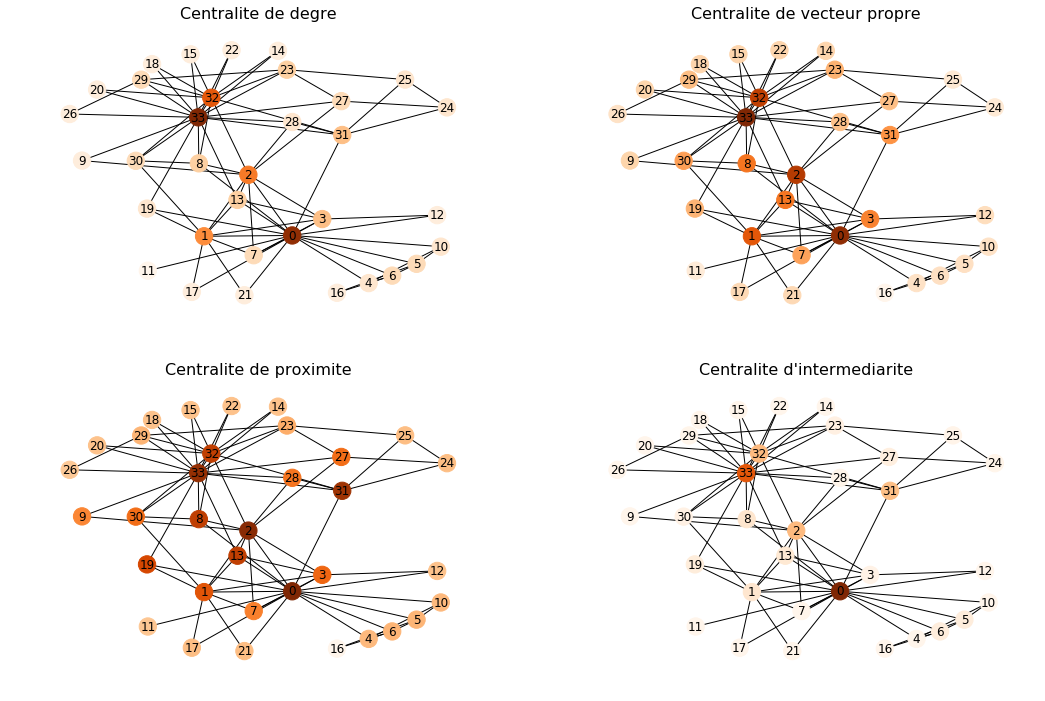

In [20]:
c_degree = list(G_karate.degree().values())
c_eigenvector = list(nx.eigenvector_centrality(G_karate).values())
c_closeness = list(nx.closeness_centrality(G_karate).values())
c_betweenness = list(nx.betweenness_centrality(G_karate).values())

plt.figure(figsize=(18, 12))
f, axarr = plt.subplots(2, 2, num=1)
plt.sca(axarr[0,0])
nx.draw(G_karate, cmap = plt.get_cmap('Oranges'), node_color = c_degree, node_size=300, pos=pos, with_labels=True)
axarr[0,0].set_title('Centralite de degre', size=16)

plt.sca(axarr[0,1])
nx.draw(G_karate, cmap = plt.get_cmap('Oranges'), node_color = c_eigenvector, node_size=300, pos=pos, with_labels=True)
axarr[0,1].set_title('Centralite de vecteur propre', size=16)

plt.sca(axarr[1,0])
nx.draw(G_karate, cmap = plt.get_cmap('Oranges'), node_color = c_closeness, node_size=300, pos=pos, with_labels=True)
axarr[1,0].set_title('Centralite de proximite', size=16)

plt.sca(axarr[1,1])
nx.draw(G_karate, cmap = plt.get_cmap('Oranges'), node_color = c_betweenness, node_size=300, pos=pos, with_labels=True)
axarr[1,1].set_title('Centralite d\'intermediarite', size=16)
plt.show()

La centralité de degré est l'importance d'un noeud en fonction de la valeur de son degré (du nombre de voisins); Avec cette centralité, ce sont les centres des clusters qui sont importants.

La centralité de vecteur propre donne de l'importance au noeud qui sont connecté au noeud déjà fortement connecté et donne moins de valeurs à ceux connecté à de petit hub. Les centres des clusters sont toujours importants mais les noeuds reliés à plusieurs de ces centres prennent de l'importances.

La centralité de proximité est l'inverse de la somme des longueurs des plus courts chemins qui relie le noeud en question, ainsi plus un noeud est proche de l'ensemble des autres noeuds plus il est importants. On le constate sur le graphe les noeuds situés au centre du graph prennent de l'importance.

La centralité d’intermédiarité correspond au nombre de plus courts chemins du graphe passant par chaque sommet. Les nœuds avec une forte centralité d’intermédiarité sont des « points de passages importants » pour relier rapidement deux sommets du graphes.

### Graphe des produits Amazon

#### Question 9 (bonus +2 pts)

On va maintenant étudier un graphe de grande taille dont les noeuds sont des produits vendus par Amazon, et deux noeuds sont connectés si les deux produits sont fréquemment achetés ensemble (plus de détails [ici](https://snap.stanford.edu/data/com-Amazon.html))

In [21]:
G_amazon = nx.read_edgelist('amazon.txt.gz')

In [22]:
X=list(G_amazon.degree().keys())
Y=list(G_amazon.degree().values())

# plt.plot(X,Y)
# plt.title('Degrées des noeuds')
# plt.show()

# min, max et médian
print('Degrée minimal:',np.min(Y))
print('Degrée maximal:',np.max(Y))
print('Degrée médian:',np.median(Y))

# moyenne
print('Moyenne empirique:',np.mean(Y))

Degrée minimal: 1
Degrée maximal: 549
Degrée médian: 4.0
Moyenne empirique: 5.529855493141971


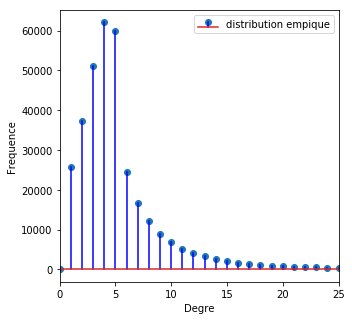

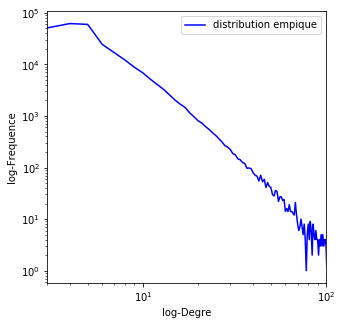

In [23]:
degree_freq = nx.degree_histogram(G_amazon)
y=degree_freq
y_theory=[np.sum(y)*scipy.stats.binom.pmf(i,n,p) for i in range(len(y))]

plt.figure(figsize=(5, 5))
plt.xlim(0,25)
plt.stem(y, 'b-',label='distribution empique')
plt.ylabel("Frequence")
plt.xlabel("Degre")
plt.legend()

plt.figure(figsize=(5, 5))
plt.xlim(3,100)
plt.loglog(y, 'b-',label='distribution empique')
plt.ylabel("log-Frequence")
plt.xlabel("log-Degre")
plt.legend()
plt.show()

Comme pour le modèle Barabási–Albert, on retrouve une ditribution suivant une loi de puissance puisque sur graphique log-log nous obtenons une droite.

In [24]:
# clustering_loc=list(clustering.values())
# print('Coefficient de clustering global empirique:',np.sum(clustering_loc)/len(clustering_loc))

In [25]:
clustering = nx.clustering(G_amazon)
degree = G_amazon.degree()

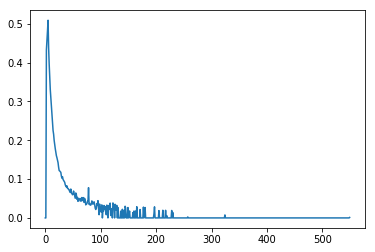

In [26]:
sum_clustering = np.zeros(550)
for i in degree.keys(): #On parcourt tout les degrées
    deg = degree[i]
    sum_clustering[deg] = sum_clustering[deg] + clustering[i] #on somme tous les clustering des noeuds ayant un degré équivalent

    
clustering_moyen_par_degree = sum_clustering/nx.degree_histogram(G_amazon) #chaque somme de clustering est divisée par le nombre de noeuds ayant le degré correspondant

clustering_moyen_par_degree[np.isnan(clustering_moyen_par_degree)] = 0 #on remplace les nan par des zéros car il y a eu des divisions par zéros

plt.plot(clustering_moyen_par_degree)

## Prédiction dans les graphes

Un *ego-network* est un sous-graphe d'un réseau social centré sur un utilisateur. Ici on va travailler avec un ego-network Facebook (téléchargeable [ici](https://snap.stanford.edu/data/egonets-Facebook.html)) qui représente les amis d'un utilisateur donné (sans ce dernier) et les liens d'amitié entre eux. Le jeu de données contient 10 ego-networks, on va travailler avec l'un d'entre eux seulement qui se prête bien à la visualisation.

Nombre de noeuds: 150
Nombre d'arêtes: 1693
Nombre de composantes connexes: 2


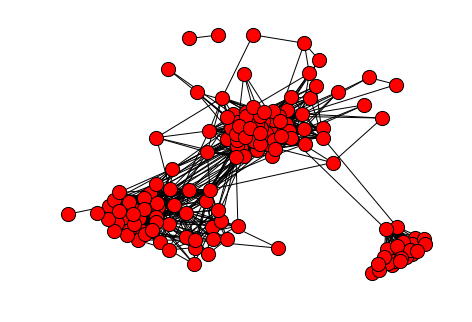

In [27]:
# if os.path.exists('facebook.tar.gz') is False:
#     resp = urllib.urlretrieve('https://snap.stanford.edu/data/facebook.tar.gz',
#                               'facebook.tar.gz')
tarfile.open("facebook.tar.gz", 'r:gz').extractall('.')

G_fb = nx.read_edgelist("facebook/414.edges")
n = G_fb.number_of_nodes()
m = G_fb.number_of_edges()
# on renumérote les noeuds de 0 à n-1
mapping=dict(zip(G_fb.nodes(), range(n)))
nx.relabel_nodes(G_fb, mapping, copy=False)
pos = nx.spring_layout(G_fb)
nx.draw(G_fb, node_size=200, pos=pos)
plt.gca().collections[0].set_edgecolor("#000000") # set node border color to black
print("Nombre de noeuds: %d" % n)
print("Nombre d'arêtes: %d" % m)
print("Nombre de composantes connexes: %d" % nx.number_connected_components(G_fb))

#### Question 10

On va maintenant essayer de prédire des liens dans le réseau. Pour cela, on commence par extraire une proportion des arêtes du graphe, dont on cherchera à prédire l'existence parmi toutes les arêtes non-existantes possibles. Le graphe d'apprentissage est le graphe original auquel on retire les arêtes sélectionnées.

In [28]:


# G_fb_train est une copie du graphe original
# auquel on a retiré 20% des arêtes choisies aléatoirement

proportion_edges = 0.2
edge_subset = random.sample(G_fb.edges(),
                            int(proportion_edges * G_fb.number_of_edges()))
G_fb_train = G_fb.copy()
G_fb_train.remove_edges_from(edge_subset)

edge_subset_size = len(list(edge_subset))
print("Nombre d'arêtes retirées: %d" % edge_subset_size)
print("Nombre d'arêtes restantes: %d" % (m - edge_subset_size))
print("Nombre total d'arêtes non-existantes: %d" %
      len(list(nx.non_edges(G_fb_train))))

Nombre d'arêtes retirées: 338
Nombre d'arêtes restantes: 1355
Nombre total d'arêtes non-existantes: 9820


On veut scorer les arêtes non-existantes de façon à ce que les arêtes réelles retirées aient un plus grand score. On utilise plusieurs mesures de similarité entre paires de noeud et on calcule l'Aire sous la Courbe ROC (AUC). On trace également les courbes ROC pour chaque similarité.

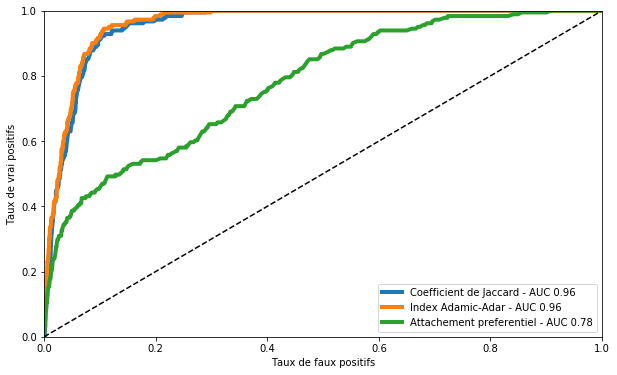

In [29]:
# exemple qui génère les scores et les labels (vrai arête ou fausse arête) avec jaccard
pred_jaccard = list(nx.jaccard_coefficient(G_fb_train))
score_jaccard, label_jaccard = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_jaccard])

fpr_jaccard, tpr_jaccard, thresholds = metrics.roc_curve(label_jaccard, score_jaccard)
auc_jaccard = metrics.auc(fpr_jaccard, tpr_jaccard)

# exemple qui génère les scores et les labels (vrai arête ou fausse arête) avec Adamic-Adar index
pred_adamic = list(nx.adamic_adar_index(G_fb_train))
score_adamic, label_adamic = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_adamic])

fpr_adamic, tpr_adamic, thresholds = metrics.roc_curve(label_adamic, score_adamic)
auc_adamic = metrics.auc(fpr_adamic, tpr_adamic)

# exemple qui génère les scores et les labels (vrai arête ou fausse arête) avec Preferential attachment
pred_pref = list(nx.preferential_attachment(G_fb_train))
score_pref, label_pref = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_pref])

fpr_pref, tpr_pref, thresholds = metrics.roc_curve(label_pref, score_pref)
auc_pref = metrics.auc(fpr_pref, tpr_pref)

# afficher ROC curve et AUC
plt.figure(figsize=(10, 6))
plt.plot(fpr_jaccard, tpr_jaccard, label='Coefficient de Jaccard - AUC %.2f' % auc_jaccard, linewidth=4)
plt.plot(fpr_adamic, tpr_adamic, label='Index Adamic-Adar - AUC %.2f' % auc_adamic, linewidth=4)
plt.plot(fpr_pref, tpr_pref, label='Attachement preferentiel - AUC %.2f' % auc_pref, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrai positifs')
plt.legend(loc='lower right')
plt.show()

Le coefficient Jaccard d'un couple mesure la similitude entre deux éléments $\frac{A\cap B}{A\cup B}$

Les indices Adamic-Adar mesure la similitude en fonction du nombre de degré

Ces deux techniques de similitudes semblent bien mieux marcher que pour l'Attachement Preferentiel.

#### Question 11

On va maintenant faire de la classification semi-supervisée des noeuds. Pour cela on va utiliser les attributs qui sont fournis avec l'ego-network. Ces attributs représentent des caractéristiques (anonymisées) des utilisateurs du réseau. Dans la suite nous allons utiliser l'attribut `43` qui vaut `+1` (rouge) si la personne a étudié dans une école donnée, et `-1` (bleu) sinon.

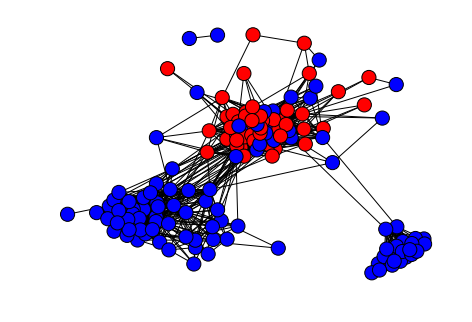

In [30]:
# on charge les labels des noeuds et on les affiche

with open('facebook/414.featnames') as f:
    for i, l in enumerate(f):
        pass

n_feat = i+1

features = np.zeros((n, n_feat))
f = open('facebook/414.feat', 'r')
for line in f:
    if line.split()[0] in mapping:
        node_id = mapping[line.split()[0]]
        features[node_id, :] = list(map(int, line.split()[1:]))

features = 2*features-1
feat_id = 43
labels = features[:, feat_id]

nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = labels, node_size=200, pos=pos)
plt.gca().collections[0].set_edgecolor("#000000") # set node border color to black

On voit que cet attribut est relativement lisse sur le graphe, il se prête donc bien à la classification par propagation de label (ce n'est pas le cas de tous les attributs!). On va donc sélectionner aléatoirement une petite proportion de noeuds pour lesquels nous aurons accès aux labels. Notre tâche sera d'utiliser ces noeuds étiquetés ainsi que la structure du graphe pour prédire le label des autres noeuds. On regarde d'abord les noeuds étiquetés.

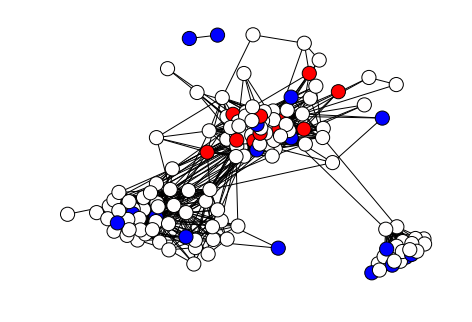

In [56]:
# on sélectionne 20% des noeuds pour lesquels on a accès à l'étiquette

random.seed(5)
proportion_nodes = 0.2
labeled_nodes = random.sample(G_fb.nodes(), int(proportion_nodes * G_fb.number_of_nodes()))

known_labels = np.zeros(n)
known_labels[labeled_nodes] = labels[labeled_nodes]

nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = known_labels, node_size=200, pos=pos)
plt.gca().collections[0].set_edgecolor("#000000") # set node border color to black

On va maintenant appliquer la propagation de label et voir les résultats

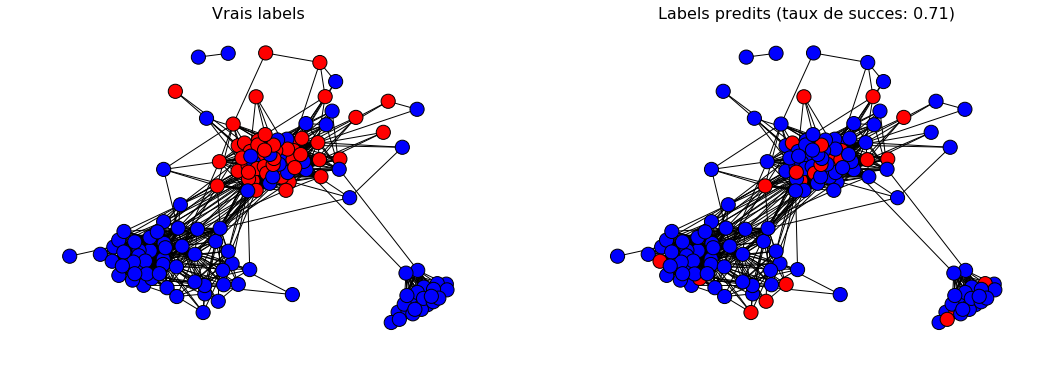

In [59]:
from sklearn.semi_supervised import LabelPropagation


nbrIter=100
alpha = 0.7
L_sym = nx.normalized_laplacian_matrix(G_fb)
I = np.eye(L_sym.shape[0]) # matrice identité de taille similaire à L_sym

# on calcule la matrice de labels initiale
Y = np.zeros((n,2))
Y[known_labels==-1, 0] = 1
Y[known_labels==1, 1] = 1
# propagation de labels à faire ici
F = Y

for i in range(nbrIter):
    F = alpha*(I - L_sym).dot(F) + (1-alpha)*Y

# labels prédits à mettre dans une variable F_pred pour affichage ci-dessous

F_pred = np.zeros(F.shape[0])
for i in range(len(F_pred)):
    if F[i,0]>F[i,-1]:
        F_pred[i]=-1
    else:
        F_pred[i]=1

# taux de succes a mettre dans une variable pred pour affichage ci-dessous
pred = np.mean(np.abs(F_pred + labels)/2)

plt.figure(figsize=(18, 6))
f, axarr = plt.subplots(1, 2, num=1)
plt.sca(axarr[0])
nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = labels, node_size=200, pos=pos)
axarr[0].set_title('Vrais labels', size=16)
plt.gca().collections[0].set_edgecolor("#000000") # set node border color to black
plt.sca(axarr[1])
nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = F_pred, node_size=200, pos=pos)
axarr[1].set_title('Labels predits (taux de succes: %.2f)' % pred, size=16)
plt.gca().collections[0].set_edgecolor("#000000") # set node border color to black

On obtient un taux de succés faible, mais ce résultat n'est pas étonnant sachant qu'on ne connait que le label de 20% des noeuds existants et qu'il faut donc prédire 120 labels avec seulement 30 noeuds!